<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Luc_Guittard_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

## **Bayesian Iterable Fxn**

In [90]:
# TODO - code!

# The Beyesian Iterable Function
def beyesian_iterable(p_prior, p_true_positive, p_false_positive, iterations):
  probabilities = []
  for _ in range(iterations):
    p_posterior = (p_true_positive * p_prior)/((p_true_positive * p_prior)+(p_false_positive * (1-p_prior)))  #Beyesian iterable formula
    probabilities.append(p_posterior)
    p_prior = p_posterior         #too easy
    
  return probabilities

beyesian_iterable(.001, 1,.08,5)  #very nice 

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734]

## **Import of data**

In [92]:
from google.colab import files
files.upload() 



Saving LobbyingData4 - z.csv to LobbyingData4 - z (3).csv


{'LobbyingData4 - z.csv': b'Year,tS,tH,tT,bH,bS,bT,mH,mS,mT,miH,miS,miT,pmH,pmS,pmT\r\n2018,1015,658,1673,73,165,238,641,816,1457,1967,3259,5226,0.32587697,0.2503835532,0.2787983161\r\n2017,1167,859,2026,33,67,100,438,668,1106,2713,5619,8332,0.161444895,0.1188823634,0.1327412386\r\n2016,781,633,1414,73,141,214,485,659,1144,1466,2714,4180,0.3308321965,0.2428150332,0.2736842105\r\n2015,1074,805,1879,37,78,115,441,525,966,2823,5060,7883,0.1562167906,0.1037549407,0.1225421794\r\n2014,908,705,1613,61,163,224,501,565,1066,1432,2505,3937,0.3498603352,0.2255489022,0.2707645415\r\n2013,1095,768,1863,16,56,72,356,366,722,2280,4434,6714,0.1561403509,0.08254397835,0.1075364909\r\n2012,930,726,1656,54,139,193,479,479,958,2014,3381,5395,0.2378351539,0.1416740609,0.1775718258\r\n2011,1102,993,2095,24,66,90,402,384,786,2447,4456,6903,0.1642827953,0.08617594255,0.1138635376\r\n2010,1075,879,1954,80,178,258,569,922,1491,1506,3098,4604,0.3778220452,0.2976113622,0.3238488271\r\n2009,1421,1247,2668,38,87,1

In [93]:
import pandas as pd

congress_data = pd.read_csv('LobbyingData4 - z.csv')
congress_data.head()

,Year,tS,tH,tT,bH,bS,bT,mH,mS,mT,miH,miS,miT,pmH,pmS,pmT
0,2018,1015,658,1673,73,165,238,641,816,1457,1967,3259,5226,0.325877,0.250384,0.278798
1,2017,1167,859,2026,33,67,100,438,668,1106,2713,5619,8332,0.161445,0.118882,0.132741
2,2016,781,633,1414,73,141,214,485,659,1144,1466,2714,4180,0.330832,0.242815,0.273684
3,2015,1074,805,1879,37,78,115,441,525,966,2823,5060,7883,0.156217,0.103755,0.122542
4,2014,908,705,1613,61,163,224,501,565,1066,1432,2505,3937,0.349860,0.225549,0.270765


In [94]:
pmT_array = congress_data['pmT'].values
print(pmT_array)

[0.27879832 0.13274124 0.27368421 0.12254218 0.27076454 0.10753649
 0.17757183 0.11386354 0.32384883 0.15948893 0.3298027  0.18944402
 0.28297917 0.16091816 0.3856674  0.18021101 0.26844694 0.15574273
 0.37037909 0.18292128 0.32111888 0.16684626 0.36426241 0.1584783
 0.3364486  0.15176313 0.3280883  0.15699923 0.33779796 0.16278755
 0.44681988 0.16706444 0.39712418 0.15160087 0.38868225 0.14306033
 0.29778761 0.10561927 0.38006014 0.12948579 0.2558106  0.09352658
 0.23937268 0.08439612 0.18921095]


## **CI calculations**

In [95]:
#testing
import numpy as np
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 - confidence) / 2.0, n-1) # division by 2 is done to get the area under one 'tail' of dist. curve
                                                               # (1+confidence)/2 = alpha lvl.  
  return (mean , mean+interval, mean-interval)

print(confidence_interval(pmT_array)) # output mean and margin-error 

(0.23159033167733337, 0.20143255897385265, 0.2617481043808141)


In [96]:
# Exploration of the great scipy.stats.bayes_mvs; 
# Need data that can be used with the Beyes approach..
# I'll be applying it to project data that I also used in running t-tests earlier this module

# need to satisfy the variable requirements: 
#  p_prior - the original expected prob of the outcome in question;
#  p_true_positive - probability of a true positive outcome;
#  p_false_positive - probability of a false positive outcome

# nevermind, see here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html 

from scipy import stats

#scipy.stats.bayes_mvs(congress_data['pmT'], alpha=0.95)
mean_confidence_interval, _, _ = stats.bayes_mvs(pmT_array, alpha=.95)
print(mean_confidence_interval) #matches test of function above, but so much easy - just need the data.values and an alpha 

Mean(statistic=0.23159033167733334, minmax=(0.20143255897385265, 0.26174810438081403))


## **Making Visualizations**

In [97]:
# playing with Bayesian tools
mean, variance, std = stats.bayes_mvs(pmT_array)
print(mean)
print(variance)
print(std)           #some nice practice, but only applicaple to Bayesian approach? - can .bayes_mvs 
                      # not be used more generaly to solve for for such measures? Where does a prior statistic 
                      # come into play here?

Mean(statistic=0.23159033167733334, minmax=(0.20644752674035147, 0.2567331366143152))
Variance(statistic=0.010556158327606112, minmax=(0.007330558045902398, 0.014884061800732653))
Std_dev(statistic=0.10213347428048938, minmax=(0.08561867813685514, 0.12200025328142827))


In [104]:
#testing the data.. (for normally distributed eg. see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html)

  #alternatively, take a sample from selected dataset

res_mean, res_var, res_std = stats.bayes_mvs(pmT_array, alpha=0.95)
print(res_mean)  # res = residual, found deeper in statistics
#print(res_var)   # res_var -> an estimate of the variation around a regression line
#print(res_std)   # the standard deviation of residual values, ie. diff. b/w observed and expected/predicted values

mean_confidence_interval, _, _ = stats.bayes_mvs(pmT_array, alpha=.95)

print(mean_confidence_interval) #matches res_mean
 

Mean(statistic=0.23159033167733334, minmax=(0.20143255897385265, 0.26174810438081403))
Mean(statistic=0.23159033167733334, minmax=(0.20143255897385265, 0.26174810438081403))


Mean(statistic=0.23159033167733334, minmax=(0.20143255897385265, 0.26174810438081403))


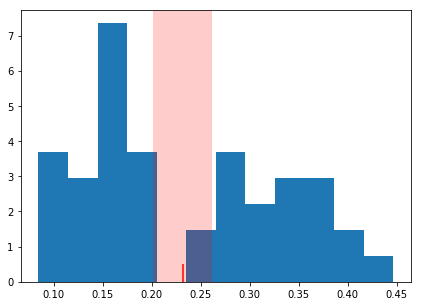

In [113]:
# making a hist showing mean CI based on 95% confidence level (Bayesian method)

print(mean_confidence_interval)

import matplotlib.pyplot as plt 
#(code sourced from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html)
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(pmT_array, bins=12, density=True)
ax.vlines(res_mean.statistic, 0, 0.5, colors='r') #vline here is estimated mean 
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r', alpha=0.2) # red span is estimated mean with 95% CI

#result demonstrates how CI is based on the mean, but doesn't show how prior data filters expectations - little blue is highlighted

0.23159033167733334
95% Confidence Interval:  (0.031546298536798356, 0.4316343648178683)


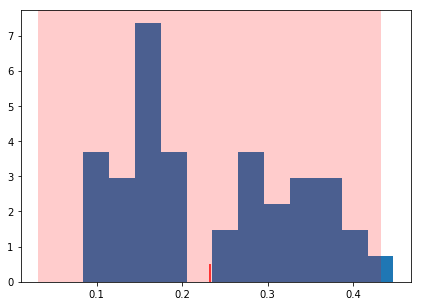

In [115]:
# using Frequentist approach (refer to Ryan Alred's Suplemental Materials, Sprint3)

#Calculating CI
from scipy.stats import t

n, dof = len(pmT_array), len(pmT_array) - 1
mean = np.mean(pmT_array)
std = np.std(pmT_array, ddof = dof)
std_err = std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print(mean)
print("95% Confidence Interval: ", CI)

#Plotting 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(pmT_array, bins=12, density=True)
ax.vlines(.232, 0, 0.5, colors='r') #vline here is estimated mean 
ax.axvspan(.032,.432, facecolor='r', alpha=0.2) # red span is estimated mean with 95% CI

#Interpreting
  # Larger CI for the frequentist approach
  # Would have perhaps been better to use categorical data 


## **A Final Word**

It has been lots of fun getting to learn about Bayesian statistics. Still not sure I understand the Let's Make a Deal conundrum, but I do appreciate the depth Bayes' theorem adds to statistics; it adds nuance to probability calculations where true and false positives are considered. Iterating through the theorem, for a common sample, one will see that the weight of true and false positives change in a manner that reflects their actual probabilities. 
Bayesian differs from Frequentist stats in its observance of prior probabilities.  

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)